In [11]:
# Import all the packages
import pandas as pd
from scipy.integrate import quad
import numpy as np
from scipy.stats import norm
import time
import matplotlib.pyplot as plt

In [17]:
#################
#Import the Constant Data 
####################

#Pole Network Data WILL NOT CHANGE
poles_network = pd.read_csv('all attribute.csv') 

#Index of simulated seeds
randseeds = np.load('randseeds.npy')

In [18]:
#Initialize a Data Frame to Store the data
resultspercent = pd.DataFrame(columns=['Seed','PercentAll','MST1-Percent','MST2-Percent','MST3-Percent', 'MST4-Percent','MST5-Percent','MST6-Percent'])

#Initialize a dict list to store data from each computation
dict_list = []

In [19]:
# poverty status percent 
t0 = time.time()
for x in randseeds[0:100]:  
    #Input hua for a given seed
    load_filename = f'OutputData/hua_v2-0-0_Galveston_TX_2010_rs{x}_63ff6b135c35c0353d5ed3ac.csv' 
    hua = pd.read_csv(load_filename)
    # Creates combined data base where households are allocated to buildings, and connected to service
    merged = hua.merge(poles_network, how = 'inner', left_on = 'guid', right_on = 'Households')
    # Create a index for the substation 
    merged["Shortest_Path__MST_"]= merged["Shortest_Path__MST_"].str.strip(']')
    merged["Shortest_Path__MST_"]= merged["Shortest_Path__MST_"].str.strip('[')
    merged["Shortest_Path__MST_"]= merged["Shortest_Path__MST_"].str.split(",")
    merged['Subs'] = merged.Shortest_Path__MST_.str[-1] #NEED THIS to pull substation 
    merged.Subs = merged.Subs.astype(int) #convert this to integer
    percent0 = sum(merged[(merged.poverty>0) | (merged.poverty<1)].poverty)/merged[(merged.poverty>0) | (merged.poverty<1)].shape[0]
    percent1 = sum(merged[(merged.Subs==1765) & (merged.poverty>0) | (merged.poverty<1)].poverty)/merged[(merged.Subs==1765) & (merged.poverty>0) | (merged.poverty<1)].shape[0]
    percent2 = sum(merged[(merged.Subs==3423) & (merged.poverty>0) | (merged.poverty<1)].poverty)/merged[(merged.Subs==3423) & (merged.poverty>0) | (merged.poverty<1)].shape[0]
    percent3 = sum(merged[(merged.Subs==1689) & (merged.poverty>0) | (merged.poverty<1)].poverty)/merged[(merged.Subs==1689) & (merged.poverty>0) | (merged.poverty<1)].shape[0]
    percent4 = sum(merged[(merged.Subs==1481) & (merged.poverty>0) | (merged.poverty<1)].poverty)/merged[(merged.Subs==1481) & (merged.poverty>0) | (merged.poverty<1)].shape[0]
    percent5 = sum(merged[(merged.Subs==4355) & (merged.poverty>0) | (merged.poverty<1)].poverty)/merged[(merged.Subs==4355) & (merged.poverty>0) | (merged.poverty<1)].shape[0]
    percent6 = sum(merged[(merged.Subs==1550) & (merged.poverty>0) | (merged.poverty<1)].poverty)/merged[(merged.Subs==1550) & (merged.poverty>0) | (merged.poverty<1)].shape[0]
    row_dict = {'Seed': x, 'PercentAll':percent0,'MST1-Percent': percent1,'MST2-Percent': percent2,'MST3-Percent': percent3, 'MST4-Percent': percent4,'MST5-Percent': percent5,'MST6-Percent':percent6}
    dict_list.append(row_dict)
resultspercent=pd.DataFrame.from_dict(dict_list)
t1 = time.time()
total_time = t1-t0

In [20]:
resultspercent

,Seed,PercentAll,MST1-Percent,MST2-Percent,MST3-Percent,MST4-Percent,MST5-Percent,MST6-Percent
0,304140,0.21744,0.002292,0.062761,0.003434,0.044794,0.096686,0.048724


In [17]:
# black percent 
t0 = time.time()
for x in randseeds[0:1000]:  
    #Input hua for a given seed
    load_filename = f'OutputData/hua_v2-0-0_Galveston_TX_2010_rs{x}_63ff6b135c35c0353d5ed3ac.csv' 
    hua = pd.read_csv(load_filename)
    # Creates combined data base where households are allocated to buildings, and connected to service
    merged = hua.merge(poles_network, how = 'inner', left_on = 'guid', right_on = 'Households')
    # Create a index for the substation 
    merged["Shortest_Path__MST_"]= merged["Shortest_Path__MST_"].str.strip(']')
    merged["Shortest_Path__MST_"]= merged["Shortest_Path__MST_"].str.strip('[')
    merged["Shortest_Path__MST_"]= merged["Shortest_Path__MST_"].str.split(",")
    merged['Subs'] = merged.Shortest_Path__MST_.str[-1] #NEED THIS to pull substation 
    merged.Subs = merged.Subs.astype(int) #convert this to integer
    percent1 = sum((merged.Subs==1765) & (merged.race==2))/sum((merged.Subs==1765) &(merged.race==1)|(merged.race==2)|(merged.race==3)|(merged.race==4)|(merged.race==5)|(merged.race==6)|(merged.race==7))
    percent2 = sum((merged.Subs==3423) & (merged.race==2))/sum((merged.Subs==3423) &(merged.race==1)|(merged.race==2)|(merged.race==3)|(merged.race==4)|(merged.race==5)|(merged.race==6)|(merged.race==7))
    percent3 = sum((merged.Subs==1689) & (merged.race==2))/sum((merged.Subs==1689) &(merged.race==1)|(merged.race==2)|(merged.race==3)|(merged.race==4)|(merged.race==5)|(merged.race==6)|(merged.race==7))
    percent4 = sum((merged.Subs==1481) & (merged.race==2))/sum((merged.Subs==1481) &(merged.race==1)|(merged.race==2)|(merged.race==3)|(merged.race==4)|(merged.race==5)|(merged.race==6)|(merged.race==7))
    percent5 = sum((merged.Subs==4355) & (merged.race==2))/sum((merged.Subs==4355) &(merged.race==1)|(merged.race==2)|(merged.race==3)|(merged.race==4)|(merged.race==5)|(merged.race==6)|(merged.race==7))
    percent6 = sum((merged.Subs==1550) & (merged.race==2))/sum((merged.Subs==1550) &(merged.race==1)|(merged.race==2)|(merged.race==3)|(merged.race==4)|(merged.race==5)|(merged.race==6)|(merged.race==7))
    row_dict = {'Seed': x, 'MST1-Percent': percent1,'MST2-Percent': percent2,'MST3-Percent': percent3, 'MST4-Percent': percent4,'MST5-Percent': percent5,'MST6-Percent':percent6}
    dict_list.append(row_dict)
resultspercent=pd.DataFrame.from_dict(dict_list)
t1 = time.time()
total_time = t1-t0

In [18]:
total_time

2419.065292596817

In [19]:
resultspercent

,Seed,MST1-Percent,MST2-Percent,MST3-Percent,MST4-Percent,MST5-Percent,MST6-Percent
0,304140,0.001137,0.095896,0.001026,0.040971,0.183039,0.058137
1,298455,0.001280,0.094817,0.001028,0.042067,0.182395,0.057214
2,474265,0.001425,0.095813,0.000735,0.041403,0.182906,0.057683
3,48192,0.001275,0.095485,0.001023,0.042955,0.181559,0.058181
4,627910,0.001140,0.095035,0.001174,0.041675,0.182588,0.058692
...,...,...,...,...,...,...,...
995,670421,0.001282,0.096566,0.001177,0.040900,0.181809,0.056820
996,723473,0.001133,0.095673,0.000879,0.041245,0.182423,0.057583
997,465721,0.001137,0.094534,0.001173,0.041807,0.182135,0.058897
998,237097,0.001282,0.095848,0.001027,0.041107,0.181703,0.058164


In [20]:
# Save the resutls
#save_filename = f'PovertyPercentages.csv'
save_filename = f'BlackPercentages.csv'
resultspercent.to_csv(save_filename, index=False)

## Post Process to See How Much Variation

In [2]:
resultspercent = pd.read_csv('PovertyPercentages.csv') #if need to load data
#resultspercent = pd.read_csv('BlackPercentages.csv') #if need to load data

In [3]:
#MST 1 Info
print("Mean", np.mean(resultspercent['MST1-Percent']))
print("Min", np.min(resultspercent['MST1-Percent']))
print("Max", np.max(resultspercent['MST1-Percent']))

Mean 0.0025727454999430175
Min 0.0015474668640247
Max 0.0037204897517418


In [4]:
#MST 2 Info
print("Mean", np.mean(resultspercent['MST2-Percent']))
print("Min", np.min(resultspercent['MST2-Percent']))
print("Max", np.max(resultspercent['MST2-Percent']))

Mean 0.06246183081523581
Min 0.0589878722458568
Max 0.0679918966827044


In [5]:
#MST 3 Info
print("Mean", np.mean(resultspercent['MST3-Percent']))
print("Min", np.min(resultspercent['MST3-Percent']))
print("Max", np.max(resultspercent['MST3-Percent']))

Mean 0.0030525388661993796
Min 0.0019601216627238
Max 0.0043871490280777


In [6]:
#MST 4 Info
print("Mean", np.mean(resultspercent['MST4-Percent']))
print("Min", np.min(resultspercent['MST4-Percent']))
print("Max", np.max(resultspercent['MST4-Percent']))

Mean 0.04668894062587229
Min 0.0436326082747047
Max 0.0497170054026241


In [7]:
#MST 5 Info
print("Mean", np.mean(resultspercent['MST5-Percent']))
print("Min", np.min(resultspercent['MST5-Percent']))
print("Max", np.max(resultspercent['MST5-Percent']))

Mean 0.09769139223770955
Min 0.0936563283782957
Max 0.1014748902974159


In [8]:
#MST 6 Info
print("Mean", np.mean(resultspercent['MST6-Percent']))
print("Min", np.min(resultspercent['MST6-Percent']))
print("Max", np.max(resultspercent['MST6-Percent']))

Mean 0.048736152341617
Min 0.0456479690522243
Max 0.0514271020827976


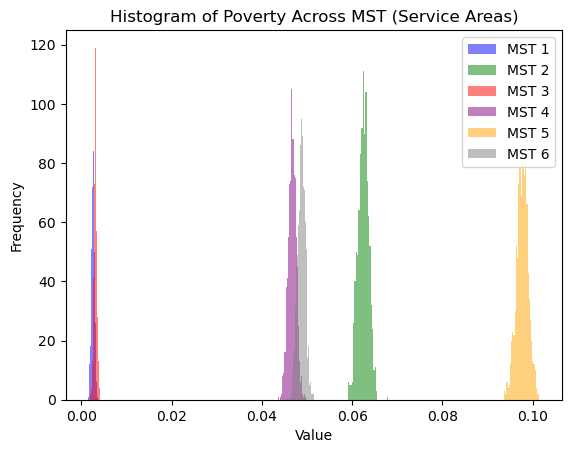

In [16]:
#plt.hist(resultspercent['MST1-Percent'])

# Creating the histogram
plt.hist(resultspercent['MST1-Percent'], bins=30, alpha=0.5, label='MST 1',color='blue')
plt.hist(resultspercent['MST2-Percent'], bins=30, alpha=0.5, label='MST 2',color='green')
plt.hist(resultspercent['MST3-Percent'], bins=30, alpha=0.5, label='MST 3',color='red')
plt.hist(resultspercent['MST4-Percent'], bins=30, alpha=0.5, label='MST 4',color='purple')
plt.hist(resultspercent['MST5-Percent'], bins=30, alpha=0.5, label='MST 5',color='orange')
plt.hist(resultspercent['MST6-Percent'], bins=30, alpha=0.5, label='MST 6',color='gray')
# Adding labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Poverty Across MST (Service Areas)')
plt.legend()